<h1><center> Tópicos Avançados em Python para Análise de Dados </center></h1>

![](https://drive.google.com/uc?export=view&id=1qCH-jlzKK1aFaTBpiTHN4qxTFrCVs720) 

<center>
<h5>
O objetivo desse material é mostrar a você como aplicar diversos métodos das duas bibliotecas mais famosas para Ciência de Dados: Pandas e Seaborn. Ao longo do curso além de conhecermos como essas ferramentas funcionam vamos praticar a análise em dados reais e transformar os dados que temos em informações. 
Vamos nessa!
<h5>
<center>

## Módulo 3

Para começar as lições práticas desse módulo, precisamos garantir que estamos com os dados carregados em nossa estrutura *DataFrame*. 

Vamos fazer isso rapidamente:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_csv('listings.csv')

In [ ]:
dados

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36424,4.89396,Private room,236,1,340,2020-04-09,2.63,2,0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.15,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,219,2020-07-25,2.05,1,158
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,336,2020-09-20,2.72,2,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,45761390,Charming 1Room Apartment in Amsterdam,310835509,TravelNest,NaN,Bos en Lommer,52.37642,4.84941,Entire home/apt,137,1,0,NaN,NaN,1,339
18778,45763935,clean and light apartment nearby the water,961670,Lisa,NaN,Westerpark,52.39042,4.88204,Entire home/apt,120,5,0,NaN,NaN,2,51
18779,45776325,A beautiful spacious room on a central location.,48168060,Tim,NaN,De Pijp - Rivierenbuurt,52.34306,4.89995,Private room,20,1,0,NaN,NaN,2,0
18780,45777642,Studio in Amsterdam,75268907,Emma,NaN,Watergraafsmeer,52.34885,4.91878,Entire home/apt,33,10,0,NaN,NaN,1,15


### Lição 2: Agregação de dados

Muitas vezes quando estamos lidando com grandes quantidades de dados, um dos passos iniciais para analisá-los é fazer uma **análise descritiva dos dados**, calculando média e desvio padrão, por exemplo. 

Esse tipo de análise permite resumir **tendências centrais** em nosso conjunto de dados. Porém, outros tipos de agregações também são importantes, como somatórios, mediana, mínimos, máximos, quantis, e *etc*.

![](https://drive.google.com/uc?export=view&id=1k0MKIrWEkG1djY-lYqbi0fbUmleIVrWI) 

**Estatísticas de agregação**

Por terem sido criado com base na biblioteca **Numpy**, os *DataFrames* e as *Series* apresentam muitos métodos que os *Numpy Arrays* também apresentam, como *soma*, *mínimo*, *máximo*, *média*, *mediana*, etc. 

Todos esses métodos consideram os valores de uma coluna e os transformam em um único valor, como mostramos no desenho acima.

Vamos ver alguns exemplos:

* Qual o total de reviews obtidas pelos Airbnbs apresentados no dataset?

In [ ]:
dados.number_of_reviews.sum()

464791

* Qual a média dessas reviews?

In [ ]:
dados.number_of_reviews.mean()

24.74661910339687

Além de fazermos a agregação considerando apenas uma coluna, podemos realiza-la em duas ou mais. 

Fazendo isso, teremos um resultado com a topologia mostrada abaixo:

![](https://drive.google.com/uc?export=view&id=1b11UF-ckLc_1p2aZn0oIWUBLGs8uqQQ4)

Vejamos alguns exemplos:

* Qual o menor preço e menor número mínimo de noites? E quais os maiores?

In [ ]:
dados[['minimum_nights','price']].min()

minimum_nights    1
price             5
dtype: int64

In [ ]:
dados[['minimum_nights','price']].max()

minimum_nights    1001
price             8000
dtype: int64

**Aggregate**

Através do método **.agg()**, o **Pandas** permite realizarmos o cálculo de várias métricas estatísticas ao mesmo tempo. 

Podemos considerar uma coluna e calcular, ao mesmo tempo, média, mediana e moda.
Repare no desenho abaixo:

![](https://drive.google.com/uc?export=view&id=1l571Ssp-zbtTI4CBUrv5fAqeMe_KfUKl)

Vejamos um exemplo:

* Qual a média, mediana, desvio padrão e variância presentes nos preços dos Airbnbs?

In [ ]:
dados.price.agg(['mean','median','std','var'])

mean        155.206208
median      129.000000
std         147.938192
var       21885.708661
Name: price, dtype: float64

Na tabela abaixo listamos os principais métodos de agregação oferecidos pelo **Pandas**. 

Eles podem ser usados tanto em *DataFrames* quando em *Series*

|      Método      |         Descrição         |
|:----------------:|:-------------------------:|
|      count()     |   Número total de itens   |
|  first(), last() |   Primeiro e último item  |
| mean(), median() |      Média e mediana      |
|   min(), max()   |      Mínimo e máximo      |
|   std(), var()   | Desvio padrão e Variância |
|       mad()      |   Desvio médio absoluto   |
|      prod()      | Produto de todos os itens |
|       sum()      |   Soma de todos os itens  |

Um método bem interessante do **Pandas** é o **.describe()** que gera várias estatísticas descritivas do *DataFrame* de forma direta. 

As informações disponíveis são: contagem, média, desvio padrão, mínimo, principais quartis e máximo.

In [ ]:
dados.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.878200e+04,1.878200e+04,0.0,18782.000000,18782.000000,18782.000000,18782.000000,18782.000000,16492.000000,18782.000000,18782.000000
mean,2.026571e+07,6.490719e+07,NaN,52.365471,4.889641,155.206208,3.569162,24.746619,0.701629,2.582047,53.631935
std,1.256165e+07,8.311726e+07,NaN,0.016496,0.035922,147.938192,14.151973,54.728818,1.327302,8.630081,107.401414
min,2.818000e+03,3.159000e+03,NaN,52.289270,4.755720,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.965431e+06,9.134263e+06,NaN,52.355130,4.863880,95.000000,2.000000,2.000000,0.140000,1.000000,0.000000
50%,1.893914e+07,2.729216e+07,NaN,52.364740,4.887030,129.000000,2.000000,8.000000,0.330000,1.000000,0.000000
75%,2.991968e+07,8.445316e+07,NaN,52.375370,4.909390,180.000000,3.000000,23.000000,0.680000,1.000000,41.000000
max,4.578300e+07,3.711601e+08,NaN,52.425120,5.068080,8000.000000,1001.000000,856.000000,47.610000,86.000000,365.000000


Mais do que apenas gerar as estatísticas descritivas, o importante é entender o que elas representam. Por exemplo, não faz sentido termos soma, média e quartis em colunas como *id* e *host_id*. Apesar de serem números, eles são apenas números de identificação. Além disso, essas mesmas informações sobre latitude e longitude também são pouco informativas.
 
Porém, quando analisamos esses dados sobre o preço dos Airbnbs conseguimos extrair informações mais coerentes. Dentro dessa base, a média de preços é 155.20, enquanto a mínima e a máxima são 5 e 8000. Uma análise possível é que os hotéis disponíveis nessa base são bastante heterogêneos, ou seja, temos dados de hoteis de diferentes faixas de preços.


Além das métricas apresentadas de forma padrão, o **.describe()** permite adicionarmos outras métrica ao conjunto calculado.

Vejamos um exemplo:

In [ ]:
desc = dados.describe()
desc.loc['sum',:]=dados.sum()
desc

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.878200e+04,1.878200e+04,0.0,18782.000000,18782.000000,1.878200e+04,18782.000000,18782.000000,16492.000000,18782.000000,1.878200e+04
mean,2.026571e+07,6.490719e+07,NaN,52.365471,4.889641,1.552062e+02,3.569162,24.746619,0.701629,2.582047,5.363193e+01
std,1.256165e+07,8.311726e+07,NaN,0.016496,0.035922,1.479382e+02,14.151973,54.728818,1.327302,8.630081,1.074014e+02
min,2.818000e+03,3.159000e+03,NaN,52.289270,4.755720,5.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000e+00
25%,9.965431e+06,9.134263e+06,NaN,52.355130,4.863880,9.500000e+01,2.000000,2.000000,0.140000,1.000000,0.000000e+00
50%,1.893914e+07,2.729216e+07,NaN,52.364740,4.887030,1.290000e+02,2.000000,8.000000,0.330000,1.000000,0.000000e+00
75%,2.991968e+07,8.445316e+07,NaN,52.375370,4.909390,1.800000e+02,3.000000,23.000000,0.680000,1.000000,4.100000e+01
max,4.578300e+07,3.711601e+08,NaN,52.425120,5.068080,8.000000e+03,1001.000000,856.000000,47.610000,86.000000,3.650000e+02
sum,3.806306e+11,1.219087e+12,0.0,983528.278690,91837.242490,2.915083e+06,67036.000000,464791.000000,11571.260000,48496.000000,1.007315e+06


### Lição 3: Concatenação de DataFrames

O **Pandas** apresenta uma grande facilidade e uma diferentes possibilidades na *concatenação* de DataFrames. 

Esse tipo de ferramenta é muito utilizado quando temos dois conjuntos de dados que apresentam informações complementares.

![](https://drive.google.com/uc?export=view&id=1JWZC56VbaPzbyloz_92xaVLtAVlPn7Gz)


**Imagine a situção:** Com a nossa base de dados de Airbnb, à medida que os hotéis vão recebendo novas avaliações, a nossa base vai ficando desatualizada. 

Se forem gerados novos dados, poderíamos juntas as duas informações para termos novamente uma base de dados completa.

In [ ]:
#Celula fixa
novos_dados = dados.sample(3)

In [ ]:
novos_dados = pd.DataFrame(novos_dados)
novos_dados

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
906,1727103,Houseboat on the Amstel,9101670,Ilona,NaN,De Pijp - Rivierenbuurt,52.33981,4.91194,Entire home/apt,175,3,11,2020-07-12,0.21,1,0
16131,36872823,Modern spacious apt in West with sunny balcony,16129402,Maarten,NaN,Slotervaart,52.36684,4.84155,Entire home/apt,120,3,2,2020-01-02,0.15,1,0
13868,29167357,Beautiful light apartment in Amsterdam,22295439,Jade,NaN,Slotervaart,52.35262,4.84127,Private room,120,1,4,2018-12-16,0.17,1,0


In [ ]:
novo_df = pd.concat([dados,novos_dados], ignore_index=True)
novo_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36424,4.89396,Private room,236,1,340,2020-04-09,2.63,2,0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.15,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,219,2020-07-25,2.05,1,158
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,336,2020-09-20,2.72,2,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18780,45777642,Studio in Amsterdam,75268907,Emma,NaN,Watergraafsmeer,52.34885,4.91878,Entire home/apt,33,10,0,NaN,NaN,1,15
18781,45783000,Spacious and cozy apartment in De Pijp,371160113,Nadezda,NaN,De Pijp - Rivierenbuurt,52.35380,4.89740,Entire home/apt,105,7,0,NaN,NaN,1,253
18782,1727103,Houseboat on the Amstel,9101670,Ilona,NaN,De Pijp - Rivierenbuurt,52.33981,4.91194,Entire home/apt,175,3,11,2020-07-12,0.21,1,0
18783,36872823,Modern spacious apt in West with sunny balcony,16129402,Maarten,NaN,Slotervaart,52.36684,4.84155,Entire home/apt,120,3,2,2020-01-02,0.15,1,0


Veja que, ao usarmos o **.concat()** precisamos passar o parâmetro ```ignore_index = True```, isso quer dizer que o método vai ignorar os índices originais dos dados que queremos inserir e dará continuidade aos indices do *DataFrame* 

Além de concatenarmos linhas, podemos também concatenar colunas nos **DataFrames**.


In [ ]:
price_dolar = pd.Series(dados.price * 1.18)

In [ ]:
pd.concat([dados,price_dolar],axis=1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,69.62
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36424,4.89396,Private room,236,1,340,2020-04-09,2.63,2,0,278.48
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.15,1,58,147.50
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,219,2020-07-25,2.05,1,158,162.84
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,336,2020-09-20,2.72,2,340,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,45761390,Charming 1Room Apartment in Amsterdam,310835509,TravelNest,NaN,Bos en Lommer,52.37642,4.84941,Entire home/apt,137,1,0,NaN,NaN,1,339,161.66
18778,45763935,clean and light apartment nearby the water,961670,Lisa,NaN,Westerpark,52.39042,4.88204,Entire home/apt,120,5,0,NaN,NaN,2,51,141.60
18779,45776325,A beautiful spacious room on a central location.,48168060,Tim,NaN,De Pijp - Rivierenbuurt,52.34306,4.89995,Private room,20,1,0,NaN,NaN,2,0,23.60
18780,45777642,Studio in Amsterdam,75268907,Emma,NaN,Watergraafsmeer,52.34885,4.91878,Entire home/apt,33,10,0,NaN,NaN,1,15,38.94


Assim como usamos o **.concat()**, podemos utilizar o **.append()**. A diferença entre esses dois métodos é que o primeiro é um método da biblioteca **Pandas**, enquanto o segundo é um método das *Series* e *DataFrames*.

In [ ]:
novo_df = dados.append(novos_dados, ignore_index=True)
novo_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36424,4.89396,Private room,236,1,340,2020-04-09,2.63,2,0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.15,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,219,2020-07-25,2.05,1,158
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,336,2020-09-20,2.72,2,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18780,45777642,Studio in Amsterdam,75268907,Emma,NaN,Watergraafsmeer,52.34885,4.91878,Entire home/apt,33,10,0,NaN,NaN,1,15
18781,45783000,Spacious and cozy apartment in De Pijp,371160113,Nadezda,NaN,De Pijp - Rivierenbuurt,52.35380,4.89740,Entire home/apt,105,7,0,NaN,NaN,1,253
18782,1727103,Houseboat on the Amstel,9101670,Ilona,NaN,De Pijp - Rivierenbuurt,52.33981,4.91194,Entire home/apt,175,3,11,2020-07-12,0.21,1,0
18783,36872823,Modern spacious apt in West with sunny balcony,16129402,Maarten,NaN,Slotervaart,52.36684,4.84155,Entire home/apt,120,3,2,2020-01-02,0.15,1,0


In [ ]:
dados = novo_df

### Lição 4: Aplicando funções nos DataFrames

Uma outra função interessante dos *DataFrames* e *Series* é a função **.apply()**. 

Ela é uma ótima alternativa para quando a "única" solução aplicável envolve um loop nas estruturas. 

Esse método pode ser comparado com o **map()** do Python. 

O **.apply()** recebe como parâmetro uma função e retorna um *DataFrame* ou uma *Series* resultante da aplicação da função aos dados.

> **Exemplo hipotético**: Ao conversamos com o fornecedor dos dados, foi informado que a quantidade de reviews foi coletada de forma errada. Ela constatou que os números da base representam a quantidade real elevado ao quadrado.

Para resolver esse problema, podemos usar o **.apply()** na coluna *number_of_reviews*.

In [ ]:
coluna_correta = dados.number_of_reviews.apply(np.sqrt)
coluna_correta

0        16.673332
1        18.439089
2         2.236068
3        14.798649
4        18.330303
           ...    
18780     0.000000
18781     0.000000
18782     3.316625
18783     1.414214
18784     2.000000
Name: number_of_reviews, Length: 18785, dtype: float64

Além de aplicar funções nativas, como **np.sqrt()**, também podemos aplicar funções criadas por nós (funções **def** ou **lambda**). 

Voltando no exemplo de preço em dólar, podemos aplicar a função lambda para fazer a transformação dos dados dessa coluna.

In [ ]:
preco_dolar = dados.price.apply(lambda x:x*1.18)
preco_dolar

0         69.62
1        278.48
2        147.50
3        162.84
4         88.50
          ...  
18780     38.94
18781    123.90
18782    206.50
18783    141.60
18784    141.60
Name: price, Length: 18785, dtype: float64

Caso os nossos dados fossem todos numéricos, poderíamos aplicar uma única função em todo o *DataFrame*. 

Isso pode ser útil em algumas situações específicas.

Por padrão, a aplicação da função ocorre em relação as colunas. Porém, podemos modificar alterando o parâmetro *axis* (eixo ao longo do qual a função será aplicada):
* 0 ou 'index': aplica a função a cada coluna.
* 1 ou ‘columns’: aplica função a cada linha.

Como exemplo, vamos criar uma função que retorna o minimo e o máximo das colunas *price*, *minimum_nights*, *number_of_reviews* e *reviews_per_month*.

In [ ]:
def min_max(linha):
    data = linha[["price", "minimum_nights", "number_of_reviews", "reviews_per_month"]]
    return pd.Series({"min": np.min(data), "max": np.max(data)})

In [ ]:
dados.apply(min_max, axis=1)

,min,max
0,1.98,278.0
1,1.00,340.0
2,0.15,125.0
3,2.00,219.0
4,2.00,336.0
...,...,...
18780,0.00,33.0
18781,0.00,105.0
18782,0.21,175.0
18783,0.15,120.0


### Lição 5: Categorização de dados em um DataFrame

Dentro do nosso *DataFrame* temos os preços dos Airbnbs. Ao observá-los, gostaríamos de categorizar os preços em três diferentes classes:

* Preços baixos
* Preços médios 
* Preços altos

O método **.cut()** nativos do **Pandas** consegue fazer essa categorização de forma bem rápida.

In [ ]:
dados['category'] = pd.cut(dados.price,3, labels=["baixos", "medios", "altos"])
dados.category

0        baixos
1        baixos
2        baixos
3        baixos
4        baixos
          ...  
18780    baixos
18781    baixos
18782    baixos
18783    baixos
18784    baixos
Name: category, Length: 18785, dtype: category
Categories (3, object): ['baixos' < 'medios' < 'altos']

In [ ]:
dados['category'] = pd.cut(dados.price, labels=["baixos", "medios", "altos", "muito alto"], 
                           bins=[0,95, 129, 180, 8000])
dados.category

0            baixos
1        muito alto
2            medios
3             altos
4            baixos
            ...    
18780        baixos
18781        medios
18782         altos
18783        medios
18784        medios
Name: category, Length: 18785, dtype: category
Categories (4, object): ['baixos' < 'medios' < 'altos' < 'muito alto']

In [ ]:
bins=dados.price.describe().loc["min":'max'].values

Veja que o método dividiu os preços nas três categorias: preços baixos, médios e altos, em que os preços baixos são menores que os preços médios que são menores que os preços altos. 

Para isso, o método considerou uma divisão do intervalos de mesmo tamanho entre os valores mínimos e máximos. 

É possivel especificar o tamanho ou intervalos das fatias por meio do [parâmetro *bins*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Dessa forma, podemos filtrar os Airbnbs apenas por preços considerados baixos.

In [ ]:
dados[dados.category == 'baixos']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,baixos
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,336,2020-09-20,2.72,2,340,baixos
5,29051,Comfortable single room,124245,Edwin,NaN,Centrum-West,52.36773,4.89151,Private room,55,2,481,2020-08-28,4.13,2,361,baixos
17,52490,Amsterdam Aqua,185836,VictorLuke,NaN,Oostelijk Havengebied - Indische Buurt,52.37005,4.93869,Private room,75,2,102,2020-01-01,0.84,1,2,baixos
18,53067,Spacious studio at the attic of a townhouse,246493,DoJo,NaN,De Pijp - Rivierenbuurt,52.35339,4.90064,Private room,40,7,354,2020-03-15,2.94,5,0,baixos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18773,45745201,Eco-friendly Double Room for longer stays - in...,363449935,Conscious Hotel Museum Square,NaN,Zuid,52.35437,4.87844,Private room,59,1,0,NaN,NaN,5,335,baixos
18774,45746264,Studio at the Canals/Jordaan LONG TERM ONLY,367437974,Sophie,NaN,Centrum-West,52.37438,4.87751,Entire home/apt,90,21,0,NaN,NaN,1,0,baixos
18776,45752472,"Affordable, Modern Twin Room Amsterdam city",15429464,Iris,NaN,Zuid,52.35451,4.87301,Private room,40,28,0,NaN,NaN,2,87,baixos
18779,45776325,A beautiful spacious room on a central location.,48168060,Tim,NaN,De Pijp - Rivierenbuurt,52.34306,4.89995,Private room,20,1,0,NaN,NaN,2,0,baixos


É interessante analisarmos a quantidade de de intâncias alocadas em cada categoria. Para isso, as *Series* e os *DataFrames* apresentam o método **.value_counts()** que conta o número de ocorrência em uma dessas estruturas de acordo com uma categoria.

![](https://drive.google.com/uc?export=view&id=19QsBbXh3wv23q_W6lEM2EcB7Xbi4WHsU)

In [ ]:
dados.category.value_counts()

baixos        4928
altos         4680
muito alto    4644
medios        4533
Name: category, dtype: int64

Podemos ver, então, que temos 4928 ocorrências da categoria *baixos*, 4533 da *médios*, 4680 da *altos* e 4644 *muito altos*

Além de criarmos novas categorias para os nossos dados, podemos transformar uma das colunas que já temos e torná-la uma categoria.

In [ ]:
dados.room_type.astype("category")

0           Private room
1           Private room
2        Entire home/apt
3           Private room
4           Private room
              ...       
18780    Entire home/apt
18781    Entire home/apt
18782    Entire home/apt
18783    Entire home/apt
18784       Private room
Name: room_type, Length: 18785, dtype: category
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

### Lição 6: O Groupby descomplicado

Como vimos na parte teórica, o **.groupby()** é utilizado para fazer análises de grupos dentro dos *DataFrames*.

Dentro do nosso *DataFrame* temos algumas categorias de tipo de quarto como (I) Quarto Privado, (II) Apartamento ou casa completo, (III) Quarto de Hotel e (IV) Quarto Compartilhado. Com a ajuda do **.groupby()**, podemos tirar algumas informações sobre cada um desses grupos:



* Qual a quantidade de instâncias para cada tipo de quarto?

In [ ]:
dados.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
room_type,,,,,,,,,,,,,,,,
Entire home/apt,14666,14640,14666,14611,0,14666,14666,14666,14666,14666,14666,12941,12941,14666,14666,14666
Hotel room,134,134,134,134,0,134,134,134,134,134,134,123,123,134,134,134
Private room,3923,3916,3923,3922,0,3923,3923,3923,3923,3923,3923,3380,3380,3923,3923,3923
Shared room,62,62,62,62,0,62,62,62,62,62,62,51,51,62,62,62


* Qual a média do atributo 'mínimo de noite' de cada um dos tipos de quarto?

![](https://drive.google.com/uc?export=view&id=16Vs_XRT3v800EMCfVCy-ubPLy-UxLBSB)

In [ ]:
dados.groupby('room_type')['minimum_nights'].mean()

room_type
Entire home/apt    3.747784
Hotel room         1.559701
Private room       2.985725
Shared room        2.516129
Name: minimum_nights, dtype: float64

* Quanto eu terei que pagar, no mínimo, para um Apartamento o casa completo?

In [ ]:
dados.groupby('room_type')['price'].min()

room_type
Entire home/apt     5
Hotel room         16
Private room       17
Shared room        16
Name: price, dtype: int64

Se necessário, podemos agregar diferenças métricas no cálculo do groupby por meio do *.agg()*.



* Qual a média, mínimo e máximo dos valores encontrados para cada tipo de *Airbnb*?

In [ ]:
dados.groupby('room_type')['price'].agg(["mean", "min", "max"])

,mean,min,max
room_type,,,
Entire home/apt,171.648711,5,8000
Hotel room,146.082090,16,1135
Private room,94.975019,17,5000
Shared room,95.741935,16,518


Em alguns casos, pode ser interessante realizarmos seleções múltiplas.
Vejamos um exemplo:

* Vamos fazer uma seleção múltipla no atributo 'category' e 'room_type'. 

* Após isso, vamos calcular valores médios para os preços e mínimo de noites.

In [ ]:
df_gc = dados.groupby(["category", "room_type"])["price", "minimum_nights"].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_gc.index
df_gc.index.levels

FrozenList([['baixos', 'medios', 'altos', 'muito alto'], ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']])

In [ ]:
df_gc.loc['baixos']

,price,minimum_nights
room_type,,
Entire home/apt,79.525392,4.038781
Hotel room,59.476923,1.307692
Private room,65.036967,2.743870
Shared room,49.934783,2.630435


In [ ]:
df_gc.loc['Hotel room'] 

KeyError: ignored

**Acessos em nível com *.xs***

In [ ]:
df_gc.xs("Hotel room", level=1)

,price,minimum_nights
category,,
baixos,59.476923,1.307692
medios,112.277778,1.555556
altos,145.677419,1.967742
muito alto,458.600000,1.750000


In [ ]:
df_gc.xs("baixos", level=0)

,price,minimum_nights
room_type,,
Entire home/apt,79.525392,4.038781
Hotel room,59.476923,1.307692
Private room,65.036967,2.743870
Shared room,49.934783,2.630435


**Acessos em nível com *.loc***

In [ ]:
df_gc.loc[ ("baixos", "Hotel room"), "price"]

59.47692307692308

In [ ]:
df_gc.loc[ [("baixos", "Hotel room"), ("baixos", "Shared room")], "price"]

category  room_type  
baixos    Hotel room     59.476923
          Shared room    49.934783
Name: price, dtype: float64

### Lição 7: Pré-processamento de dados

### Lição 8: Tratamento textual com o Pandas

Quando estamos lidando com bases de dados reais, nos deparamos com dados textuais de diversas formas. Na nossa base, temos algumas colunas do tipo ```object``` que apresentam informações textuais: 

In [ ]:
dados.dtypes

id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood_group                float64
neighbourhood                       object
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
category                          category
dtype: object

Porém, muitas vezes esses dados textuais não apresentam nenhum padrão que facilite e torne útil a utilização deles. 

Para facilitar a manipulação desses dados, o **Pandas** apresentas formas de tratamento textual que pode ser aplicada tanto nos dados no interior do dataset, ou mesmo nos nomes de colunas e índices do *DataFrame*.

Dentro das nossas colunas, podemos observar que a coluna *last_review* possui a data, **em forma de texto**, em que a última avaliação do Airbnb aconteceu. 

A data está separada da seguinte forma: ```ano-mês-dia```. 

Vamos manipular essa informação e separar os dados ano e mês.

In [ ]:
dados.last_review.str.split('-')

0        [2020, 02, 14]
1        [2020, 04, 09]
2        [2020, 02, 09]
3        [2020, 07, 25]
4        [2020, 09, 20]
              ...      
18780               NaN
18781               NaN
18782    [2020, 07, 12]
18783    [2020, 01, 02]
18784    [2018, 12, 16]
Name: last_review, Length: 18785, dtype: object

In [ ]:
dados.last_review.str.split('-',expand=True)

,0,1,2
0,2020,02,14
1,2020,04,09
2,2020,02,09
3,2020,07,25
4,2020,09,20
...,...,...,...
18780,NaN,NaN,NaN
18781,NaN,NaN,NaN
18782,2020,07,12
18783,2020,01,02


Outro exemplo é a coluna ```neighbourhood```, na qual alguns dados estão separados por *-*. Imagine que para nós seja mais interessante que esses nomes fossem separados por espaços.

In [ ]:
dados.neighbourhood.str.replace('-',' ')

0        Oostelijk Havengebied   Indische Buurt
1                                  Centrum Oost
2                                  Centrum West
3                                  Centrum West
4                                  Centrum West
                          ...                  
18780                           Watergraafsmeer
18781                   De Pijp   Rivierenbuurt
18782                   De Pijp   Rivierenbuurt
18783                               Slotervaart
18784                               Slotervaart
Name: neighbourhood, Length: 18785, dtype: object

Se for do nosso interesse, podemos colocar todos os caracteres em letras minúsculas ou maiúsculas, com a ajuda do **.lower()**.

In [ ]:
dados.room_type.str.lower()

0           private room
1           private room
2        entire home/apt
3           private room
4           private room
              ...       
18780    entire home/apt
18781    entire home/apt
18782    entire home/apt
18783    entire home/apt
18784       private room
Name: room_type, Length: 18785, dtype: object

Podemos perceber que todos os métodos que temos nas *Strings* conseguem ser acessados através dessa operação **srt**. 

Isso significa que, além dos métodos mostrados, podemos tratar essas colunas de texto da mesma forma que tratamos *strings*. 

Se você não se lembra muito dos métodos das *Strings*, veja o nosso curso [Fundamentos Essencias para Python](https://www.voitto.com.br/digital/fundamentos-essenciais-para-python), no qual detalhamos tudo sobre essa estrutura de dados.

### Lição 9: Lidando com dados duplicados

Quando estamos analisando dados, é importante nos atentarmos aos dados duplicados. Por exemplo, se tivermos um Airbnb que foi anotado mais de uma vez, isso pode influenciar negativamente nos resultados das nossas análises.

Por exemplo, se os dados repetidos tiverem um preço muito elevado, isso aumentaria a média de preços dentro da nossa base, nos levando a acreditar que os Airbnbs possuem em média um valor maior do que realmente é praticado.

Para nos auxiliar nessas situações, as *Series* e os *DataFrames* possuem o método **.duplicated()**, que retorna *Series* booleana mostrando se aquela linha é uma duplicata ou não.

In [ ]:
dados.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18780    False
18781    False
18782     True
18783     True
18784     True
Length: 18785, dtype: bool

Para saber a quantidade de dados duplados utilizamos o método **.sum()**

In [ ]:
dados.duplicated().sum()

3

Depois de verificar se temos ou não dados duplicados devemos saber o que vamos fazer com eles. Para excluí-los usamos o método **.drop_duplicates()**

In [ ]:
dados = dados.drop_duplicates()

In [ ]:
dados.duplicated().sum()

0

Pronto, agora não temos mais dados duplicados em nossa base.

É importante ressaltarmos que, em alguns casos, se apenas algumas colunas apresentarem informações igual os dados são considerados duplicados, para isso passamos os nomes das colunas para o parâmetro ```subset```. Veja um pouco mais [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

### Lição 10: Lidando com dados faltantes 

Ao plotarmos nossos dados, podemos nos deparar com alguns dados **NaN**. O que são esses dados?

O tipo de dado **NaN** significa **Not a Number** e é um tipo de dado numérico usado para representar qualquer valor que é indefinido ou não apresentável. Dentre as possibilidades do **NaN** temos:

![](https://drive.google.com/uc?export=view&id=1uHl3qocayM6Fo6qPkgLDXUdcDnW7pFWn)

Na nossa base de dados, o **NaN** representa dados faltantes, ou seja, não temos informações sobre esses dados. Para verificar se temos dados faltantes podemos usar três métodos diferentes: **.info()**, **.isna()** ou **.isnull()**. 

O **.info()** trás uma informação completa sobre os dados, enquanto o **.isna()** e o **.isnull()** mostram apenas quais são os dados faltantes

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18782 entries, 0 to 18781
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18782 non-null  int64   
 1   name                            18749 non-null  object  
 2   host_id                         18782 non-null  int64   
 3   host_name                       18726 non-null  object  
 4   neighbourhood_group             0 non-null      float64 
 5   neighbourhood                   18782 non-null  object  
 6   latitude                        18782 non-null  float64 
 7   longitude                       18782 non-null  float64 
 8   room_type                       18782 non-null  object  
 9   price                           18782 non-null  int64   
 10  minimum_nights                  18782 non-null  int64   
 11  number_of_reviews               18782 non-null  int64   
 12  last_review       

In [ ]:
dados.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
18778,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
18779,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
18780,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False


Da mesma forma que fizemos com o **.duplicated()** vamos fazer com o **isna()**

In [ ]:
dados.isna().sum()

id                                    0
name                                 33
host_id                               0
host_name                            56
neighbourhood_group               18782
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2290
reviews_per_month                  2290
calculated_host_listings_count        0
availability_365                      0
category                              0
dtype: int64

Em tratamentos simplificados, podemos tomar duas ações frente a dados faltantes 
* (1) apagá-los ou 
* (2) substituí-los por outro valor. 

Para sabermos qual usar, devemos analisar nossos dados. 

* Perceba que a coluna *neigbourhood_group* é, em sua grande maioria, composta por **NaN**. Se não vamos precisar dessa informação para nossas analises, podemos apagá-la. 

* Quanto temos poucos valores faltantes e a exclusão deles não fariam diferença para as análises, poderíamos considerar a exclusão das instâncias que possuíssem dados faltantes.

* Em situações nas quais o percentual de dados faltantes fosse moderados, poderíamos buscar estratégias para substituí-los por valores médios ou predições considerando um modelo de regressão a parte. 

|   Método  |                               Descrição                               |
|:---------:|:---------------------------------------------------------------------:|
| .fillna() | Preenche os valores NA / NaN usando o que foi passado como parâmetro. |
| .dropna() |                       Remove valores faltantes.                       |

In [ ]:
dados = dados.drop(columns='neighbourhood_group')
dados.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,category
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,baixos
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36424,4.89396,Private room,236,1,340,2020-04-09,2.63,2,0,muito alto


In [ ]:
dados['name'] = dados.name.fillna('No Name')
dados['host_name'] = dados.host_name.fillna('No Name')
dados['last_review'] = dados.last_review.fillna('No review')
dados['reviews_per_month'] = dados.reviews_per_month.fillna(0)

Uma possibilidade para tratamentos simples de dados faltantes em colunas numéricas é a substituição do valor *NaN* pela **média / mediana / moda dos valores presentes nessa coluna**.

In [ ]:
dados.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
category                          0
dtype: int64

Veja que não temos mais dados faltantes na nossa base e ela está preparada para ser analisada. 

Uma ação comum nesse momento é salvar nossa base de dados já processada.

In [ ]:
dados.to_csv('listings_limpa.csv', index=False)

### Lição 11: Pandas + Matplotlib

Como já dito, o **Pandas** é construído tendo como base tanto a biblioteca **Numpy**, quanto a **Matplotlib**. 

Graças às características do **Matplotlib**, conseguimos criar gráficos diretamente com as estruturas *Series* e *DataFrames*. 

Através do método **.plot()** conseguimos criar diferentes tipos de gráficos, como gráficos de barras, gráficos de linhas e muitos outros.

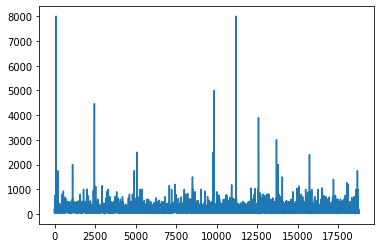

In [ ]:
dados.price.plot()

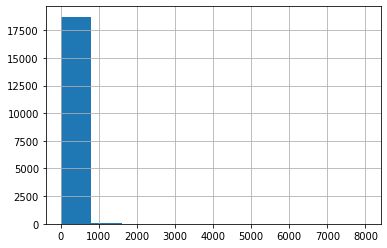

In [ ]:
dados.price.hist()

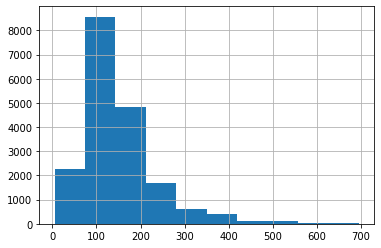

In [ ]:
dados.price[dados.price < 700].hist()

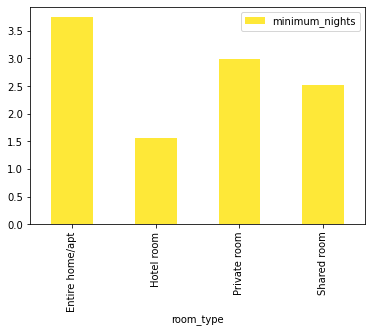

In [ ]:
dados[['minimum_nights','room_type']].groupby('room_type').mean().plot(kind='bar', colormap='cividis_r')

Perceba que passamos como parâmetro qual o tipo (*kind*) de gráfico que desejamos criar, porém, também é possível fazer no formato (**plot.'kind'()**):

```
dados[['minimum_nights','room_type']].groupby('room_type').mean().plot.bar()
```


Na nossa base de dados, temos as informações de qual a vizinhança que o Airbnb está e qual o tipo dele. Vendo isso, temos algumas perguntas interessantes:

* Qual a porcentagem que cada tipo de Airbnb representa na vizinhança *Centrum-Oost* (Centro Leste)?

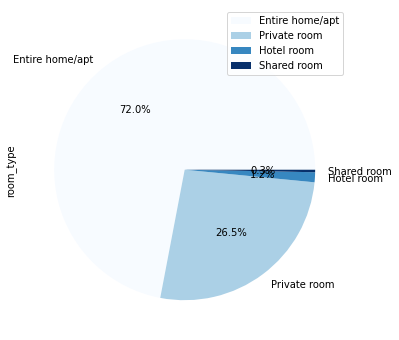

In [ ]:
viz = dados[dados.neighbourhood == 'Centrum-Oost']
viz.room_type.value_counts().plot(kind='pie', colormap='Blues', subplots=True, figsize=(10,6),
                                                                      autopct='%1.1f%%')
plt.legend(loc='upper right')

Repare que, por conta da integração do **Matplolib** com o **Pandas** os parâmetros para estilização dos gráficos são praticamente iguais

* Qual a área com média de preço mais cara? E qual a mais barata?

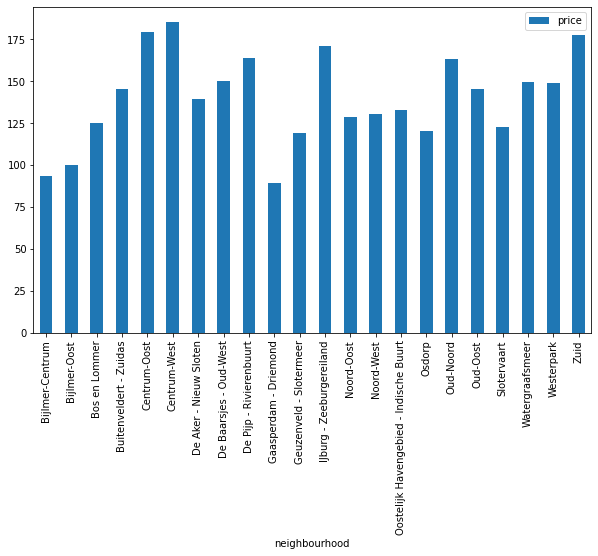

In [ ]:
grupo = dados[['neighbourhood','price']].groupby('neighbourhood').mean()

grupo.plot.bar(figsize=(10,6))

A grande parte dos gráficos presentes no **Matplotlib** podem ser usados diretamente através dos *DataFrames* e *Series*. 

Se quiser saber mais sobre quais são os tipos de gráficos e como funcionam os parâmetros, veja o nosso curso de [Python intermediário para Análise de Dados](https://voitto.com.br/digital/python-intermediario-para-analise-de-dados).